### Simple Neural Network Example - MNIST Digits

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/3_NeuralNetworks/neural_network.ipynb

In [1]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

C:\Users\ianno\Anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
print(tf.__version__)

tf.autograph.set_verbosity(0)

2.4.0


#### Data Import

In [3]:
#import dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#preview labels (range from 0-9 as we're dealing with digits)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### EDA

In [5]:
#how many images in training set?
len(x_train)

60000

In [6]:
x_train.shape #each image is represented as 28x28 pixels

(60000, 28, 28)

In [7]:
len(x_test) #10K images in the test set

10000

#### Preprocessing

We'll want to preprocess the data before training the neural net. Let's examine an image in the dataset to get a sense of what we're dealing with...

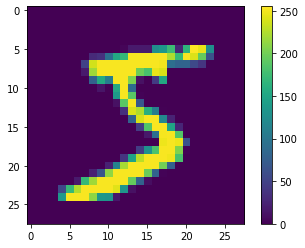

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Note that the pixel values always fall within the range of 0-255 (can change the image above to test). We'll scale these to a range of 0-1 before modeling.

In [9]:
#scaling pixel feature
x_train = x_train / 255
x_test = x_test / 255 #remember to also preprocess test set

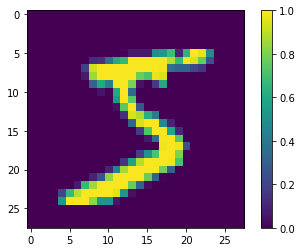

In [10]:
#now we see pixel values range from 0-1
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that data is in correct format, let's preview the first 25 images from the training set and display the class name below each image

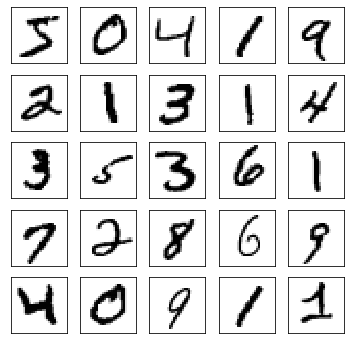

In [11]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

#### Build Model

In [12]:
#build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #transforms image format (28x28) to a 1D array
    tf.keras.layers.Dense(128, activation = 'relu'), #1st Dense layer that has 128 neurons
    tf.keras.layers.Dense(256, activation = 'relu'), #let's add a 2nd dense layer with 256 neurons
    tf.keras.layers.Dense(10) #final Dense layer returns the desired output (10 different clothing classes)
])

In [13]:
#compile the model
model.compile(optimizer = 'adam', #multiple optimizers to choose from
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #measures how accurate the model is during training...minimizing this function helps "steer" the model in the right direction
             metrics = ['accuracy']) #here we're using accuracy (i.e., are images correctly classified or not)

In [14]:
#from keras_tqdm import TQDMProgressBar

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [15]:
#fit the model
model.fit(x_train,
         y_train,
         epochs = 10, #an epoch is one full iteration over the entire x and y data provided
         verbose = 0,
         callbacks=[tqdm_callback],
         validation_data=(x_train, y_train))

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 2/10



Epoch 3/10



Epoch 4/10



Epoch 5/10



Epoch 6/10



Epoch 7/10



Epoch 8/10



Epoch 9/10



Epoch 10/10


We see accuracy go from about 93% up to 99% by epoch 10 on the training data.

In [16]:
#evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0, callbacks=[tqdm_callback])

print('nTest accuracy:', test_acc)


nTest accuracy: 0.9793999791145325


We obtain 98% accuracy on the test set.

#### Making Predictions

With the model trained, we can use it to make predictions about some images.

In [17]:
#attach a softmax layer to convert the logits to probabilities (easier to interpret) (https://deepai.org/machine-learning-glossary-and-terms/softmax-layer)
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [18]:
#define predictions
predictions = probability_model.predict(x_test)
    #these are the predicted labels for each image in the testing set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


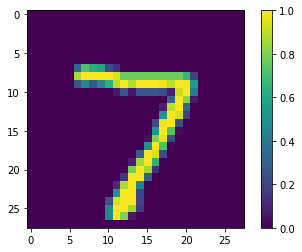

In [19]:
#examine first image in test set
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
#what did the model predict?
predictions[0]
    #looks to predict 7 correctly...

array([1.2210420e-12, 2.4475902e-10, 2.7558339e-10, 4.7078603e-09,
       1.8932369e-12, 8.4282886e-11, 1.9617410e-14, 9.9999988e-01,
       1.3167645e-10, 6.2596314e-08], dtype=float32)

In [21]:
#confirm by checking the test labels
y_test[0]

7

In [22]:
#neat plot functions to visualize the class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

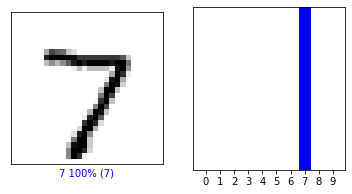

In [23]:
i = 0 #first image of test set
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

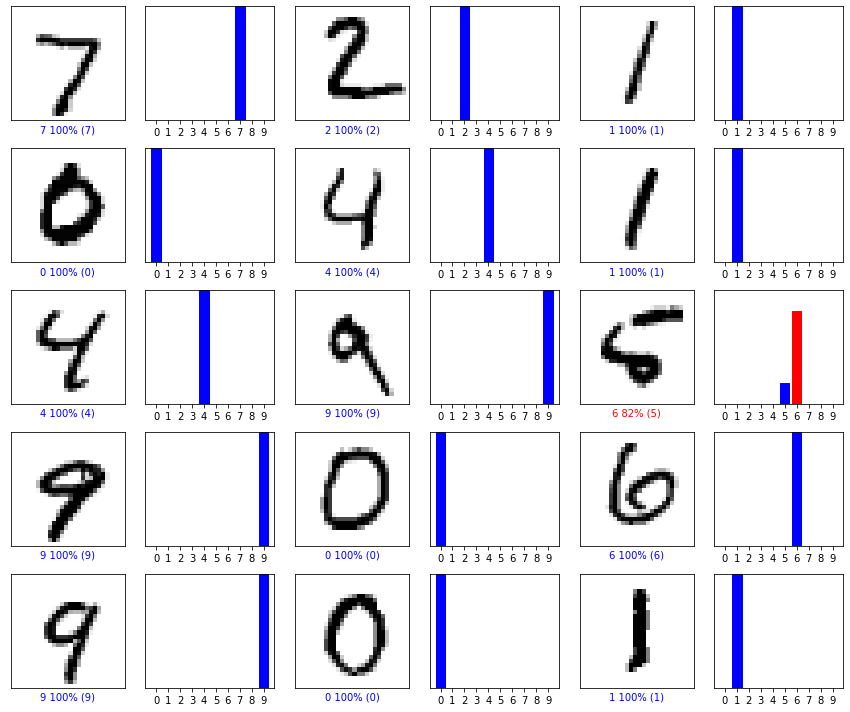

In [24]:
#for several images now

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()